In [ ]:
#Part 1 

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [6]:
data = fetch_california_housing()
#print(data) test

In [3]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['Target'] = data['target']

In [7]:
#Exploring data

In [10]:
print("Statistical Summary:", df.describe())

Statistical Summary:              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        

In [9]:
print("\nData Preview:", df.head())


Data Preview:    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [11]:
print("\nMetadata:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Metadata: None


In [12]:
#processing data

In [13]:
print("\nMissing Data:", df.isnull().sum())


Missing Data: MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


In [ ]:
# normalising continuous variables

In [14]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_scaled['Target'] = df['Target']

In [15]:
df['HouseAgeCategory'] = pd.cut(df['HouseAge'], bins=[0, 10, 30, 50, float('inf')], labels=['New', 'Young', 'Old', 'Very Old'])

In [16]:
df_encoded = pd.get_dummies(df, columns=['HouseAgeCategory'], drop_first=True)

In [17]:
# creating matrix and visualisation

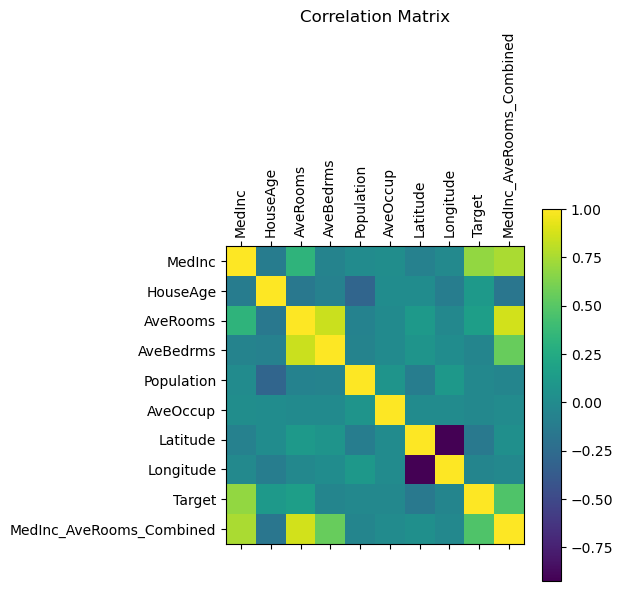

In [20]:
numerical_columns = df.select_dtypes(include=['float64']).columns
correlation_matrix = df[numerical_columns].corr()

# Visualization of correlation matrix
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


In [19]:
df['MedInc_AveRooms_Combined'] = df['MedInc'] + df['AveRooms']

In [21]:
# Part 2 

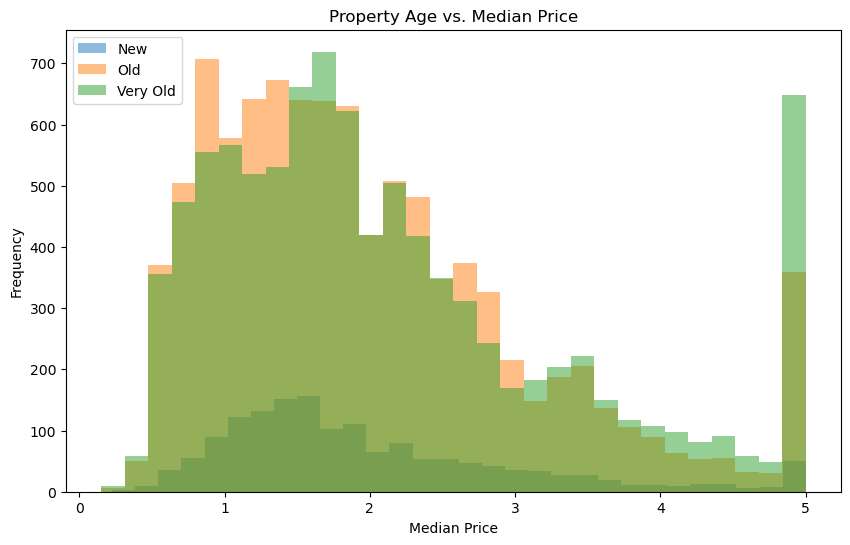

In [22]:
# boolean index for Age Groups
df['AgeGroup'] = pd.cut(df['HouseAge'], bins=[-float('inf'), 10, 30, float('inf')],
                        labels=['New', 'Old', 'Very Old'])

# Plotting Histograms
plt.figure(figsize=(10, 6))
for age_group in ['New', 'Old', 'Very Old']:
    plt.hist(df[df['AgeGroup'] == age_group]['Target'],
             bins=30, alpha=0.5, label=age_group)

plt.title('Property Age vs. Median Price')
plt.xlabel('Median Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [23]:
# Part 3 

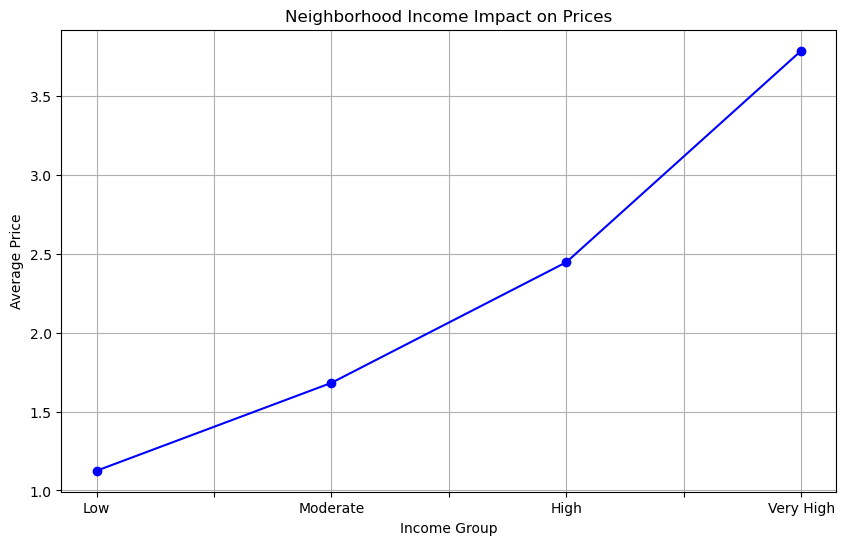

In [24]:
# Creating Binned Income
df['IncomeGroup'] = pd.cut(df['MedInc'], bins=[-float('inf'), 2, 4, 6, float('inf')],
                           labels=['Low', 'Moderate', 'High', 'Very High'])

# Grouping by Binned Income and finding average Target
income_group_avg_price = df.groupby('IncomeGroup')['Target'].mean()

# Plotting Line Plot
plt.figure(figsize=(10, 6))
income_group_avg_price.plot(marker='o', linestyle='-', color='b')
plt.title('Neighborhood Income Impact on Prices')
plt.xlabel('Income Group')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()
